1. CAN WE CUT THE MSA OF THE TWO REFERENCES ON THE BASIS OF THE COORDINATES OF JUST ONE REFERENCE?

2. ARE THERE REGIONS IN THE GENOME THAT HAVE HIGHER SNPS THAN OTHERS?

In [2]:
from Bio import AlignIO
import numpy as np
import matplotlib.pyplot as plt

def read_msa(path):
    alignment = AlignIO.read(open(path), "fasta")
    print(alignment)
    l=alignment.get_alignment_length()
    msa_matrix=np.zeros([3,l],dtype=str)
    for i,record in enumerate(alignment):
        for pos,nuc in enumerate(record.seq):
            msa_matrix[i][pos]=nuc
    return msa_matrix

def analyse_msa_matrix(msa_matrix):
    l=len(msa_matrix[0])
    snps = np.zeros(l, dtype=int)
    indels = np.zeros(l, dtype=int)

    for pos,array in enumerate(msa_matrix[0]):
        nuc_first_ref=msa_matrix[0,pos]
        nuc_second_ref=msa_matrix[1,pos]
        if nuc_first_ref=='-' or nuc_second_ref=='-':
            indels[pos]=1
        else:
            if nuc_first_ref!=nuc_second_ref:
                snps[pos]=1

    
    return snps, indels

Alignment with 2 rows and 142274 columns
-tctttgtcaagtgctgcatgaaaaatttacaatcttgtatggt...--- EM11
ctctttgtcaagtgctgcatgaaaaatttacaagcttgtatggt...ttc EM60


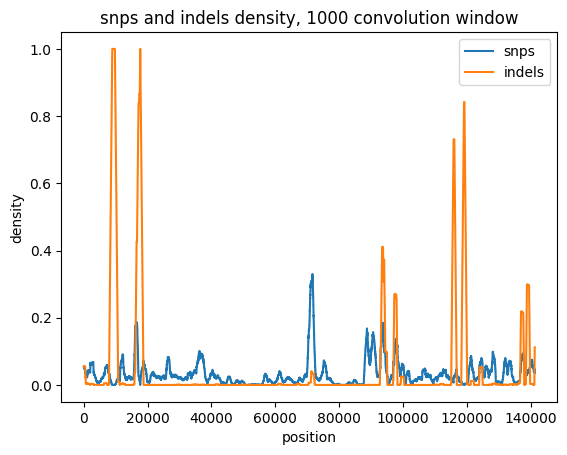

In [12]:
file=f'/home/jack/code/recombinant_population_analysis/results/msa/refs_msa.fasta'

msa_matrix = read_msa(file)

convolution_window=1000

snps, indels = analyse_msa_matrix(msa_matrix)
snps_density=np.convolve(snps, np.ones(convolution_window), mode='valid')/convolution_window
indels_density=np.convolve(indels, np.ones(convolution_window), mode='valid')/convolution_window

plt.plot(snps_density, label='snps')
plt.plot(indels_density, label='indels')
plt.title(f'snps and indels density, {convolution_window} convolution window')
plt.legend()
plt.xlabel('position')
plt.ylabel('density')
plt.show()

huge gaps in EM60. Still we can assume that the msa 

In [14]:
snps_freq = sum(snps)/len(snps)
snps_freq

0.033660401759984256

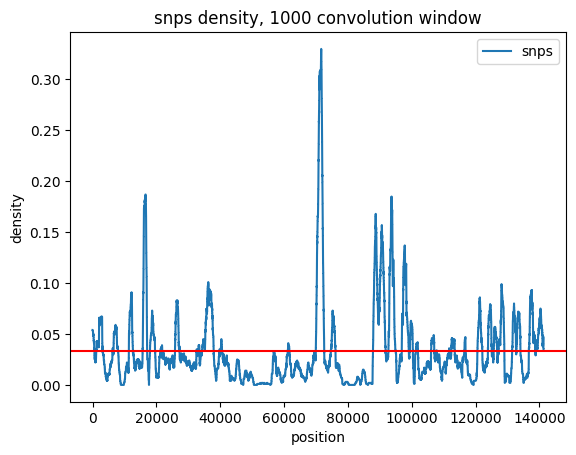

In [15]:
plt.plot(snps_density, label='snps')
plt.axhline(y = snps_freq, color = 'r', linestyle = '-')
plt.title(f'snps density, {convolution_window} convolution window')
plt.legend()
plt.xlabel('position')
plt.ylabel('density')
plt.show()

33.6 snps in 1 kb

there are a couple of regions in which this quantity seems to differ a lot